# Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import models , layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Plantvillage",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 6063 files belonging to 5 classes.


In [4]:
class_names = dataset.class_names
class_names
print(class_names)
n_classes = len(class_names)
print(n_classes)

['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___healthy']
5


In [5]:
len(dataset)

190

In [6]:
455*32

14560

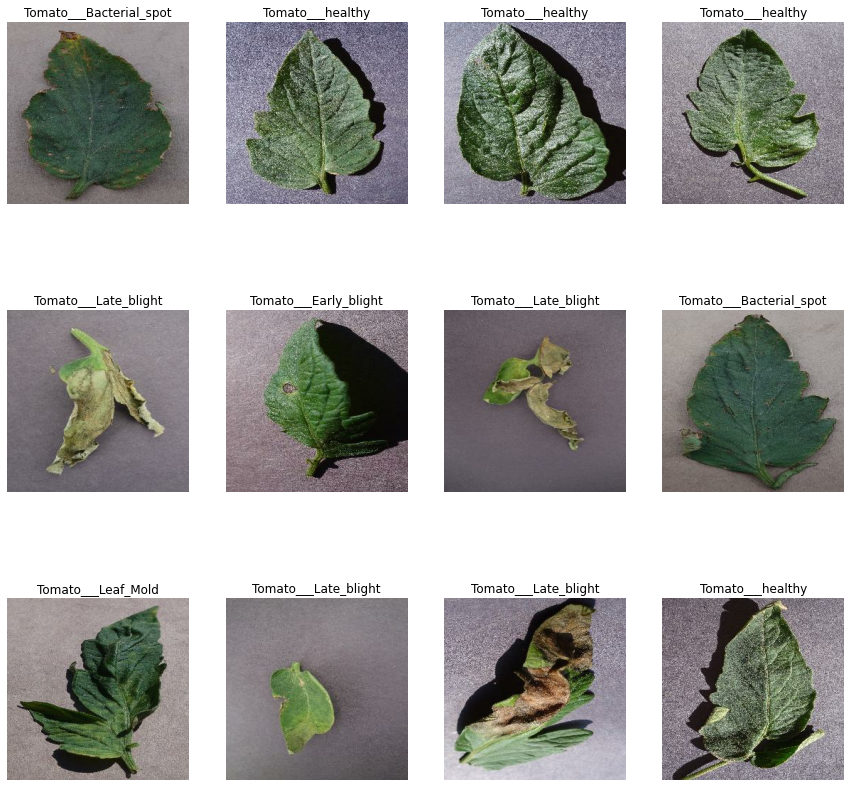

In [7]:
plt.figure(figsize=(15,15))
for image_batch , label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")


In [9]:
train_size = 0.8
len(dataset)*train_size

152.0

In [10]:
train_ds = dataset.take(364)
len(train_ds)

190

In [11]:
test_ds = dataset.skip(364)
len(test_ds)

0

In [12]:
val_size = 0.1
len(dataset)*val_size

19.0

In [13]:
val_ds = test_ds.take(45)
len(val_ds)

0

In [14]:
test_ds = test_ds.skip(45)
len(test_ds)

0

In [16]:
def get_dataset_partitions_tf(ds, train_split = 0.8 , val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.take(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds
    

In [17]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [18]:
len(train_ds)

152

In [19]:
len(val_ds)

19

In [20]:
len(test_ds)

19

In [21]:
train_ds = train_ds.cache().shuffle(10000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(10000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(10000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [22]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [23]:
data_agumentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [114]:
input_shape = (BATCH_SIZE , IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
model = models.Sequential([
    resize_and_rescale,
    data_agumentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation='softmax')
    
])

model.build(input_shape = input_shape)

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
sequential_1 (Sequential)    (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 125, 125, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 62, 62, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 60, 60, 32)         

In [26]:
model.compile(
optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [27]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/50
152/152 [==============================] - 276s 2s/step - loss: 1.4250 - accuracy: 0.4159 - val_loss: 1.1700 - val_accuracy: 0.5329
Epoch 2/50
152/152 [==============================] - 249s 2s/step - loss: 0.9783 - accuracy: 0.6196 - val_loss: 1.0836 - val_accuracy: 0.5855
Epoch 3/50
152/152 [==============================] - 241s 2s/step - loss: 0.7264 - accuracy: 0.7209 - val_loss: 0.8535 - val_accuracy: 0.6760
Epoch 4/50
152/152 [==============================] - 241s 2s/step - loss: 0.5903 - accuracy: 0.7757 - val_loss: 0.8326 - val_accuracy: 0.6974
Epoch 5/50
152/152 [==============================] - 243s 2s/step - loss: 0.4862 - accuracy: 0.8174 - val_loss: 0.7596 - val_accuracy: 0.7089
Epoch 6/50
152/152 [==============================] - 244s 2s/step - loss: 0.4245 - accuracy: 0.8345 - val_loss: 0.3669 - val_accuracy: 0.8388
Epoch 7/50
152/152 [==============================] - 243s 2s/step - loss: 0.3923 - accuracy: 0.8504 - val_loss: 0.4250 - val_accuracy: 0.8273

In [31]:
scores = model.evaluate(test_ds)

19/19 [==============================] - 6s 306ms/step - loss: 0.1557 - accuracy: 0.9474


In [32]:
scores

[0.15571516752243042, 0.9473684430122375]

In [33]:
history

In [34]:
history.history

{'loss': [1.4249956607818604,
  0.9782729744911194,
  0.726360559463501,
  0.5903071761131287,
  0.4862491488456726,
  0.42454537749290466,
  0.39226871728897095,
  0.35142022371292114,
  0.30878520011901855,
  0.32027241587638855,
  0.2978750467300415,
  0.27559274435043335,
  0.265370637178421,
  0.2754925489425659,
  0.25291478633880615,
  0.2184624969959259,
  0.21933501958847046,
  0.19605955481529236,
  0.21200616657733917,
  0.18434734642505646,
  0.15652216970920563,
  0.1645936816930771,
  0.15778803825378418,
  0.14721277356147766,
  0.15967488288879395,
  0.13180296123027802,
  0.13821831345558167,
  0.10753821581602097,
  0.13086111843585968,
  0.11303607374429703,
  0.12147820740938187,
  0.11099006980657578,
  0.11588764190673828,
  0.09642212092876434,
  0.10229474306106567,
  0.10541730374097824,
  0.07913228869438171,
  0.12585288286209106,
  0.08992480486631393,
  0.08772146701812744,
  0.06823965162038803,
  0.088593490421772,
  0.07742876559495926,
  0.0996576547622

In [35]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 152}

In [36]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [37]:
history.history['accuracy']

[0.41592738032341003,
 0.6195585131645203,
 0.7208582758903503,
 0.7757375836372375,
 0.8174128532409668,
 0.8345368504524231,
 0.8504229187965393,
 0.8698163628578186,
 0.8844646215438843,
 0.8797194361686707,
 0.8902413845062256,
 0.8933360576629639,
 0.9024138450622559,
 0.9020012617111206,
 0.9024138450622559,
 0.9178873300552368,
 0.9197441935539246,
 0.9284093379974365,
 0.9156178832054138,
 0.9310913681983948,
 0.9424386024475098,
 0.9387249946594238,
 0.9424386024475098,
 0.9471838474273682,
 0.9397565722465515,
 0.9515163898468018,
 0.9531669020652771,
 0.9595625996589661,
 0.9544047713279724,
 0.9597689509391785,
 0.9583247303962708,
 0.9605941772460938,
 0.9587373733520508,
 0.9671962261199951,
 0.9630699157714844,
 0.9610068202018738,
 0.9723540544509888,
 0.9558489918708801,
 0.9676088094711304,
 0.968227744102478,
 0.9762740135192871,
 0.9667835831642151,
 0.9723540544509888,
 0.963688850402832,
 0.9665772914886475,
 0.9692593216896057,
 0.9678151607513428,
 0.96822774410

In [38]:
accur = history.history['accuracy']
val_accur = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

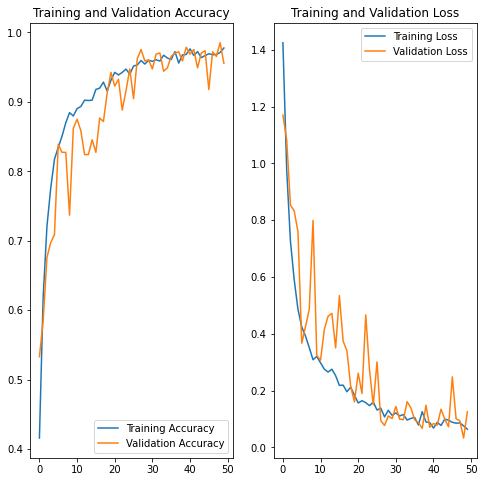

In [43]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), accur , label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_accur , label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss , label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss , label = 'Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

First Image to predict
Image Actual Label :  Tomato___Leaf_Mold
Image Predicted Label :  Tomato___Leaf_Mold


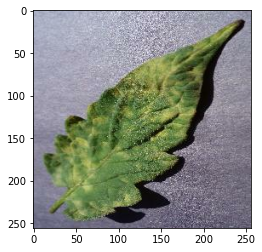

In [68]:
import numpy as np

for image_batch , label_batch in test_ds.take(1):
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()
    
    print("First Image to predict")
    plt.imshow(first_image)
    print("Image Actual Label : ", class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("Image Predicted Label : ", class_names[np.argmax(batch_prediction[0])] )

In [89]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class , confidence

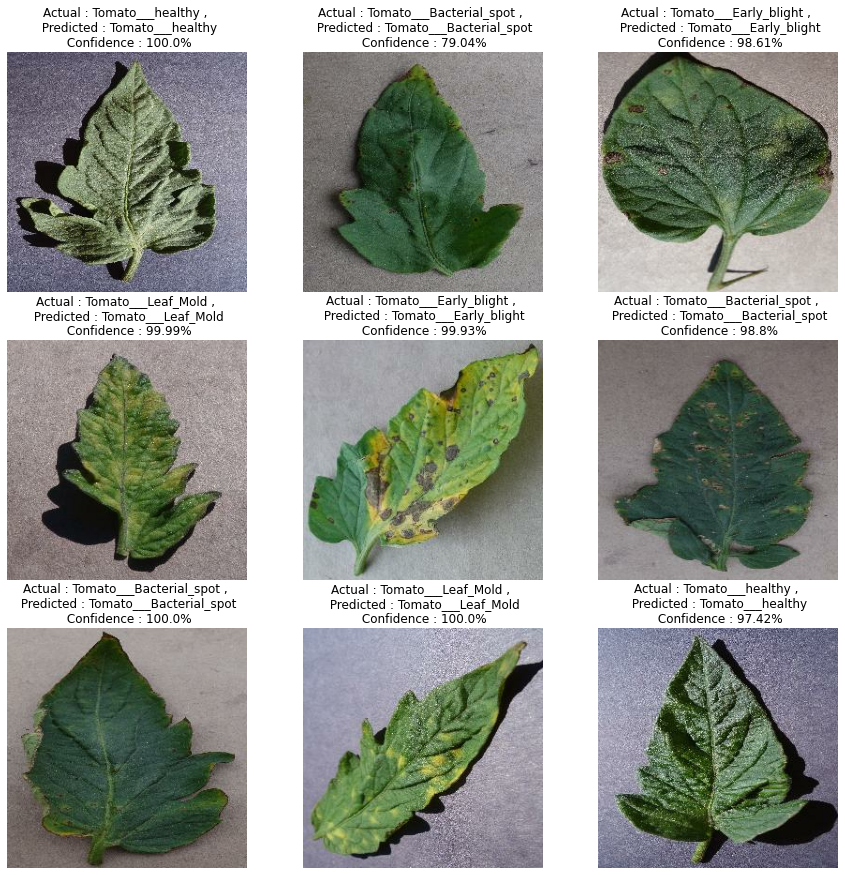

In [93]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3 , 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f'Actual : {actual_class} , \n Predicted : {predicted_class}\n Confidence : {confidence}')
        plt.axis('off')
        

In [1]:
import os
model_version = max([int(i) for i in os.listdir('../models')] + [0]) +1
model.save(f"../models/{model_version}")

FileNotFoundError: [WinError 3] The system cannot find the path specified: '../models'

In [111]:
model_version = max([int(i) for i in os.listdir('../models')] + [0]) +1

tf.keras.models.save_model(
    model,
    f"../models/{model_version}",
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)


INFO:tensorflow:Assets written to: ../models/2\assets
